In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings("ignore")

# CLASSIFICATION 
Predict models with the extracted dataset

In [26]:
df = pd.read_csv('FinalDataset.csv')
Prediction_Scores={}
df.head()


,index,genre,chrom_spec,spec_centroid,spec_bandwidth,spec_rolloff,zcr,tempo,rms,mfcc1,...,mfcc41,mfcc42,mfcc43,mfcc44,mfcc45,mfcc46,mfcc47,mfcc48,mfcc49,mfcc50
0,0,blues,0.350088,1784.165850,2002.449060,3805.839606,0.083045,123.046875,0.130228,-113.570650,...,1.737207,-0.249805,-3.693819,-1.979933,-2.660221,-1.128808,0.707248,4.705580,0.645501,-2.445936
1,1,blues,0.340914,1530.176679,2039.036516,3550.522098,0.056040,107.666016,0.095948,-207.501685,...,1.132773,-1.661641,-2.498394,-2.912226,-4.111734,-2.870191,0.194629,0.953764,-2.822235,-3.975501
2,2,blues,0.363637,1552.811865,1747.702312,3042.260232,0.076291,161.499023,0.175570,-90.722595,...,3.726901,1.322144,-1.801256,-1.589433,1.614465,-1.590961,-4.517298,-3.311691,2.159647,-1.998483
3,3,blues,0.404785,1070.106615,1596.412872,2184.745799,0.033309,172.265625,0.141093,-199.544200,...,0.875079,-3.008363,-4.552734,-3.047183,-4.454864,-4.106451,-4.109830,-1.769092,-2.784498,-5.746883
4,4,blues,0.308526,1835.004266,1748.172116,3579.757627,0.101461,135.999178,0.091529,-160.337711,...,2.071163,0.596108,-2.696403,-5.808816,-6.010361,-2.101307,1.732747,2.219933,-3.609360,-3.765912


In [27]:
df.keys()

Index(['index', 'genre', 'chrom_spec', 'spec_centroid', 'spec_bandwidth',
       'spec_rolloff', 'zcr', 'tempo', 'rms', 'mfcc1', 'mfcc2', 'mfcc3',
       'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24',
       'mfcc25', 'mfcc26', 'mfcc27', 'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31',
       'mfcc32', 'mfcc33', 'mfcc34', 'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38',
       'mfcc39', 'mfcc40', 'mfcc41', 'mfcc42', 'mfcc43', 'mfcc44', 'mfcc45',
       'mfcc46', 'mfcc47', 'mfcc48', 'mfcc49', 'mfcc50'],
      dtype='object')

In [28]:
X=df[['chrom_spec', 'spec_centroid', 'spec_bandwidth','spec_rolloff', 'zcr', 'tempo', 'rms', 'mfcc1', 'mfcc2', 'mfcc3','mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10','mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17','mfcc18', 'mfcc19', 'mfcc20', 'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24','mfcc25', 'mfcc26', 'mfcc27', 'mfcc28', 'mfcc29', 'mfcc30']]
Y=df[['genre']]
print(X.shape)
print(Y.shape)

(999, 37)
(999, 1)


# Feature Scaling and Splitting Data

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=22)
print(Y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


(100, 1)


# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
modelLG = LogisticRegression(multi_class='ovr',solver='liblinear')
modelLG.fit(X_train,Y_train)
print("Train data accuracy: ",modelLG.score(X_train,Y_train))
print("Test data accuracy: ", modelLG.score(X_test,Y_test))
Prediction_Scores["Logistic Regression"]=modelLG.score(X_test,Y_test)

Train data accuracy:  0.7274749721913237
Test data accuracy:  0.72


# NAIVE BAYES

In [33]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
print("Train data accuracy: ",nb.score(X_train,Y_train))
print("Test data accuracy: ", nb.score(X_test,Y_test))
Prediction_Scores["NAIVE BAYES"]=nb.score(X_test,Y_test)

Train data accuracy:  0.5027808676307007
Test data accuracy:  0.54


# SVM

In [34]:
# SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf') # testing various kernels
svm.fit(X_train,Y_train)
print("Train data accuracy: ",svm.score(X_train,Y_train),"Test data accuracy: ", svm.score(X_test,Y_test))
Prediction_Scores["SVM"]=svm.score(X_test,Y_test)

Train data accuracy:  0.8665183537263627 Test data accuracy:  0.71


In [73]:
# TUNING HYPERPARAMETERS

In [35]:
# tuning svm
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

print("# Tuning hyper-parameters")
print()
clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='accuracy')
clf.fit(X_train, Y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()


# Tuning hyper-parameters

Best parameters set found on development set:

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on development set:

0.113 (+/-0.037) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.113 (+/-0.037) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.115 (+/-0.041) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.115 (+/-0.041) for {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
0.410 (+/-0.040) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.113 (+/-0.037) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.115 (+/-0.041) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.115 (+/-0.041) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.410 (+/-0.040) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.113 (+/-0.037) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.115 (+/-0.041) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.115 (+/-0.041) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.679 (+/-0.056) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

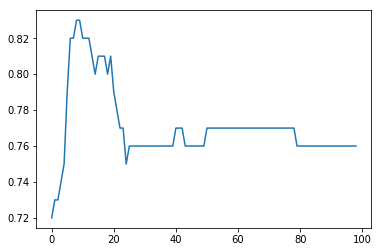

In [36]:
#finding the best c value
scores=[]
for i in range(1,100):
    svm = SVC(C=i,gamma=1e-2,kernel='rbf') 
    svm.fit(X_train,Y_train)
    scores.append(svm.score(X_test,Y_test))
    #print(svm.score(X_test,Y_test))
plt.plot(scores)

In [37]:
svm = SVC(C=12,gamma=1e-2,kernel='rbf') # further manually tuning C
svm.fit(X_train,Y_train)
#scores.append(svm.score(X_test,Y_test))
print(svm.score(X_test,Y_test))
Prediction_Scores["SVM"]=svm.score(X_test,Y_test)

0.82


# GradientBoosting 

In [74]:
#GradiesntBoosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.1 ,n_estimators=50)
gb.fit(X_train,Y_train)
print("Train data accuracy: ",gb.score(X_train,Y_train),"Test data accuracy: ", gb.score(X_test,Y_test))
Prediction_Scores["GradientBoosting"]=gb.score(X_test,Y_test)

Train data accuracy:  0.9922135706340378 Test data accuracy:  0.68


# QDA

In [41]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,Y_train)
print("Train data accuracy: ",qda.score(X_train,Y_train),"Test data accuracy: ", qda.score(X_test,Y_test))
Prediction_Scores["QDA"]=qda.score(X_test,Y_test)

Train data accuracy:  0.9777530589543938 Test data accuracy:  0.73


# LDA

In [42]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
print("Train data accuracy: ",lda.score(X_train,Y_train),"Test data accuracy: ", lda.score(X_test,Y_test))
Prediction_Scores["LDA"]=lda.score(X_test,Y_test)

Train data accuracy:  0.7063403781979978 Test data accuracy:  0.75


# RandomForest

In [43]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,Y_train)
print("Train data accuracy: ",rf.score(X_train,Y_train),"Test data accuracy: ", rf.score(X_test,Y_test))
Prediction_Scores["RandomForest"]=rf.score(X_test,Y_test)

Train data accuracy:  0.9988876529477196 Test data accuracy:  0.71


In [75]:
#tuning hyperparameters

In [21]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 1000, 50))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size =0.3, random_state=1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=451, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [45]:
rf = RandomForestClassifier(max_depth=15,n_estimators=451)
rf.fit(X_train,Y_train)
print("Train data accuracy: ",rf.score(X_train,Y_train),"Test data accuracy: ", rf.score(X_test,Y_test))
Prediction_Scores["RandomForest"]=rf.score(X_test,Y_test)

Train data accuracy:  0.9988876529477196 Test data accuracy:  0.71


# Nueral Networks

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=22)
print(Y_test.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(100, 1)


In [53]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [54]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train = encoder.fit_transform(Y_train)
y_test = encoder.transform(Y_test)
y_train.shape

(899, 10)

In [56]:
history = model.fit(X_train,y_train,epochs=150,batch_size=900)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
899/899 [==============================] - 1s 1ms/step - loss: 2.3605 - acc: 0.1446
Epoch 2/150
899/899 [==============================] - 0s 19us/step - loss: 2.2481 - acc: 0.1935
Epoch 3/150
899/899 [==============================] - 0s 14us/step - loss: 2.1683 - acc: 0.2803
Epoch 4/150
899/899 [==============================] - 0s 18us/step - loss: 2.0960 - acc: 0.3737
Epoch 5/150
899/899 [==============================] - 0s 17us/step - loss: 2.0295 - acc: 0.3849
Epoch 6/150
899/899 [==============================] - 0s 18us/step - loss: 1.9653 - acc: 0.3960
Epoch 7/150
899/899 [==============================] - 0s 20us/step - loss: 1.9026 - acc: 0.4027
Epoch 8/150
899/899 [==============================] - 0s 17us/step - loss: 1.8415 - acc: 0.4004
Epoch 9/150
899/899 [==============================] - 0s 32us/step - loss: 1.7830 - acc: 0.3982
Epoch 10/150
899/899 [==============================] - 0s 20us/step - loss: 1.7

899/899 [==============================] - 0s 16us/step - loss: 0.1688 - acc: 0.9766
Epoch 83/150
899/899 [==============================] - 0s 18us/step - loss: 0.1611 - acc: 0.9789
Epoch 84/150
899/899 [==============================] - 0s 41us/step - loss: 0.1538 - acc: 0.9800
Epoch 85/150
899/899 [==============================] - 0s 21us/step - loss: 0.1467 - acc: 0.9822
Epoch 86/150
899/899 [==============================] - 0s 16us/step - loss: 0.1399 - acc: 0.9855
Epoch 87/150
899/899 [==============================] - 0s 20us/step - loss: 0.1333 - acc: 0.9867
Epoch 88/150
899/899 [==============================] - 0s 18us/step - loss: 0.1271 - acc: 0.9878
Epoch 89/150
899/899 [==============================] - 0s 18us/step - loss: 0.1210 - acc: 0.9900
Epoch 90/150
899/899 [==============================] - 0s 33us/step - loss: 0.1153 - acc: 0.9911
Epoch 91/150
899/899 [==============================] - 0s 39us/step - loss: 0.1098 - acc: 0.9911
Epoch 92/150
899/899 [===========

In [58]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)
Prediction_Scores["NueralNets"]=test_acc

100/100 [==============================] - 0s 130us/step
test_acc:  0.74


# Results
SVM seems to give the highest accuracy

{'Logistic Regression': 0.72, 'NAIVE BAYES': 0.54, 'SVM': 0.82, 'GradientBoosting': 0.67, 'QDA': 0.73, 'LDA': 0.75, 'RandomForest': 0.71, 'NueralNets': 0.74}


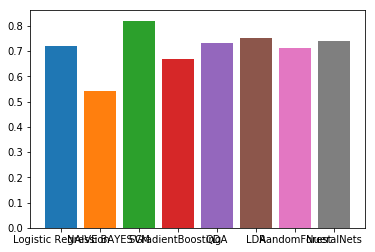

<Figure size 1152x576 with 0 Axes>

In [71]:
print(Prediction_Scores)
#plt.plot(Prediction_Scores)    
names = list(Prediction_Scores.keys())
values = list(Prediction_Scores.values())
plt.bar(0,values[0],tick_label=names[0])
plt.bar(1,values[1],tick_label=names[1])
plt.bar(2,values[2],tick_label=names[2])
plt.bar(3,values[3],tick_label=names[3])
plt.bar(4,values[4],tick_label=names[4])
plt.bar(5,values[5],tick_label=names[5])
plt.bar(6,values[6],tick_label=names[6])
plt.bar(7,values[7],tick_label=names[7])
plt.xticks(range(0,8),names)
plt.savefig('fruit.png')
plt.figure(figsize=(16,8))
plt.show()

# Confusion Matrix to see the results of Genre 
Classical, Metal,Pop are predicted more accurately

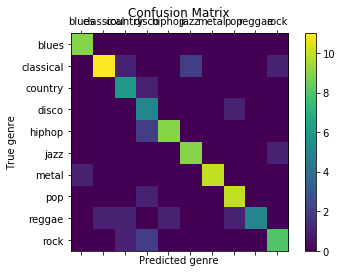

<Figure size 864x576 with 0 Axes>

In [67]:
Y_pred = svm.predict(X_test)

# plotting confusion matrix of our classifier

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
 
labels = ['blues','classical','country', 'disco','hiphop', 'jazz', 'metal', 'pop','reggae', 'rock']

cm = confusion_matrix(Y_test,Y_pred,labels)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title("Confusion Matrix")
plt.colorbar(cax)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel("Predicted genre")
plt.ylabel("True genre")
plt.figure(figsize=(12,8))
plt.show()